$$
\begin{split}
P(x)&=\frac1Z\exp(-\beta E(x))\\
&=\frac1Z\exp\left(-\frac{E(x)}{kT}\right)
\end{split}
$$

- “最大化似然”（maximize the likelihood）和“最小化能量”（minimize the energy）可以视为等价
- 最大化概率（似然）$P(x)$ 等价于最小化能量 $E(x)$。这是因为指数函数是单调增加的，能量越低，指数值越大，概率越高。
- 在机器学习，特别是能量基模型中，常常需要优化参数以最大化观测数据的似然。这等价于最小化模型对数据分配的能量。具体来说，给定模型参数 $\theta$, 观测数据 $x$ 的似然为：
    
    $$
    L(\theta)=P(x|\theta)=\frac1{Z(\theta)}\exp(-E(x;\theta))
    $$
  - 最大化 𝐿(𝜃) 等价于最小化 𝐸(𝑥;𝜃)，因为 𝑍(𝜃)对于 𝑥 是常数。
- 负对数似然与能量：在优化过程中，通常使用负对数似然（Negative Log-Likelihood），因为对数函数将乘积转化为和，便于计算：

$$
-\log L(\theta)=E(x;\theta)+\log Z(\theta)
$$


配分函数 Z = 1.0000


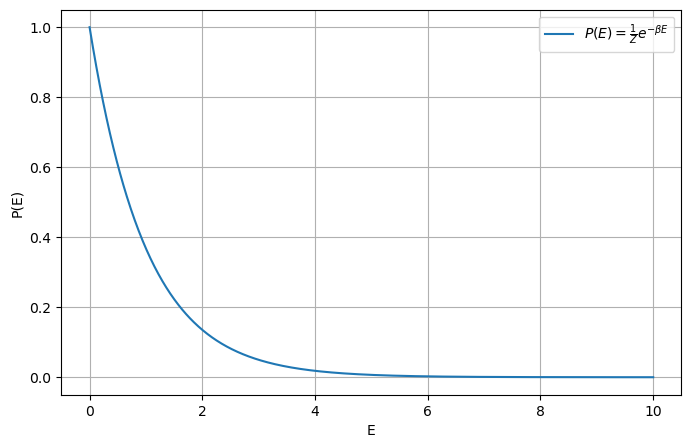

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 定义连续的能量范围
E = np.linspace(0, 10, 1000)  # 能量从0到10，取1000个点

# 定义倒温度beta
beta = 1.0  # 设定kT=1，因此beta=1

# 计算未归一化的概率密度
P_unnormalized = np.exp(-beta * E)

# 计算配分函数Z（通过数值积分）
Z = np.trapz(P_unnormalized, E)

# 计算归一化的概率密度函数P(E)
P = P_unnormalized / Z

# 输出配分函数Z的值（可选）
print(f"配分函数 Z = {Z:.4f}")

# 可视化 P(E) 与 E 的关系
plt.figure(figsize=(8, 5))
plt.plot(E, P, label=r'$P(E) = \frac{1}{Z} e^{-\beta E}$')
plt.xlabel('E')
plt.ylabel('P(E)')
plt.legend()
plt.grid(True)
plt.show()


状态	能量	概率
1	1.0	0.6364
2	2.0	0.2341
3	3.0	0.0861
4	4.0	0.0317
5	5.0	0.0117


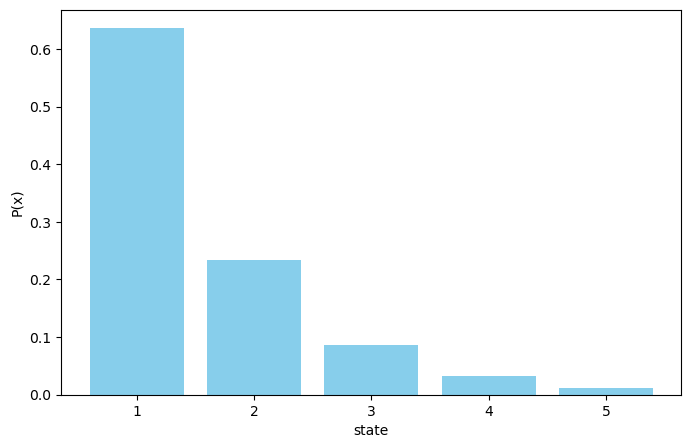

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 定义状态和对应的能量
states = np.array([1, 2, 3, 4, 5])
energies = np.array([1.0, 2.0, 3.0, 4.0, 5.0])  # 能量值

# 定义倒温度beta（β）
beta = 1.0  # 通常β=1/(kT)，这里假设kT=1

# 计算Boltzmann因子（未归一化的概率）
boltzmann_factors = np.exp(-beta * energies)

# 计算配分函数Z（归一化常数）
Z = np.sum(boltzmann_factors)

# 计算每个状态的概率P(x)
probabilities = boltzmann_factors / Z

# 输出每个状态的能量和对应的概率
print("状态\t能量\t概率")
for state, energy, probability in zip(states, energies, probabilities):
    print(f"{state}\t{energy}\t{probability:.4f}")

# 可视化概率分布
plt.figure(figsize=(8, 5))
plt.bar(states, probabilities, color='skyblue')
plt.xlabel('state')
plt.ylabel('P(x)')
plt.title('')
plt.xticks(states)
plt.show()